<a href="https://colab.research.google.com/github/Dipto1971/Statistical-Analysis-Data-Science/blob/main/LAB/LAB_06/Lab_06(Parametric_Hypothesis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown 1g0Y27WxxsQCWWagNqUvajlre3tDOKsbM

Downloading...
From: https://drive.google.com/uc?id=1g0Y27WxxsQCWWagNqUvajlre3tDOKsbM
To: /content/syntactic_car_factory_data.csv
100% 528k/528k [00:00<00:00, 89.2MB/s]


In [ ]:
import pandas as pd
df = pd.read_csv('/content/syntactic_car_factory_data.csv')
df.head()

,Unnamed: 0,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_Status,Shift,Line
0,0,54.967142,48.617357,NaN,NaN,47.658466,47.658630,65.792128,57.674347,45.305256,NaN,NaN,NaN,Line B
1,1,45.365823,45.342702,52.419623,30.867198,32.750822,44.377125,39.871689,53.142473,40.919759,NaN,Faulty,Morning,Line A
2,2,64.656488,47.742237,50.675282,35.752518,44.556173,51.109226,38.490064,53.756980,43.993613,47.083063,Faulty,Morning,Line C
3,3,43.982934,68.522782,49.865028,39.422891,NaN,37.791564,52.088636,30.403299,NaN,51.968612,Faulty,Night,Line A
4,4,57.384666,51.713683,48.843517,46.988963,35.214780,42.801558,45.393612,NaN,53.436183,32.369598,NaN,Night,Line A


In [ ]:
df.drop("Unnamed: 0" , axis=1 , inplace=True)

In [ ]:
df.head()

,Sensor_1,Sensor_2,Sensor_3,Sensor_4,Sensor_5,Sensor_6,Sensor_7,Sensor_8,Sensor_9,Sensor_10,Sensor_Status,Shift,Line
0,54.967142,48.617357,NaN,NaN,47.658466,47.658630,65.792128,57.674347,45.305256,NaN,NaN,NaN,Line B
1,45.365823,45.342702,52.419623,30.867198,32.750822,44.377125,39.871689,53.142473,40.919759,NaN,Faulty,Morning,Line A
2,64.656488,47.742237,50.675282,35.752518,44.556173,51.109226,38.490064,53.756980,43.993613,47.083063,Faulty,Morning,Line C
3,43.982934,68.522782,49.865028,39.422891,NaN,37.791564,52.088636,30.403299,NaN,51.968612,Faulty,Night,Line A
4,57.384666,51.713683,48.843517,46.988963,35.214780,42.801558,45.393612,NaN,53.436183,32.369598,NaN,Night,Line A


In [ ]:
# Fill missing values
df.info()
df.fillna(df.mean(numeric_only=True), inplace= True)

for column in df.select_dtypes(include=['object']):
    df[column].fillna(df[column].mode()[0], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sensor_1       2471 non-null   float64
 1   Sensor_2       2439 non-null   float64
 2   Sensor_3       2460 non-null   float64
 3   Sensor_4       2422 non-null   float64
 4   Sensor_5       2439 non-null   float64
 5   Sensor_6       2477 non-null   float64
 6   Sensor_7       2467 non-null   float64
 7   Sensor_8       2436 non-null   float64
 8   Sensor_9       2415 non-null   float64
 9   Sensor_10      2478 non-null   float64
 10  Sensor_Status  2469 non-null   object 
 11  Shift          2451 non-null   object 
 12  Line           2470 non-null   object 
dtypes: float64(10), object(3)
memory usage: 304.8+ KB


<ipython-input-5-0cb77fabf188>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sensor_1       3000 non-null   float64
 1   Sensor_2       3000 non-null   float64
 2   Sensor_3       3000 non-null   float64
 3   Sensor_4       3000 non-null   float64
 4   Sensor_5       3000 non-null   float64
 5   Sensor_6       3000 non-null   float64
 6   Sensor_7       3000 non-null   float64
 7   Sensor_8       3000 non-null   float64
 8   Sensor_9       3000 non-null   float64
 9   Sensor_10      3000 non-null   float64
 10  Sensor_Status  3000 non-null   object 
 11  Shift          3000 non-null   object 
 12  Line           3000 non-null   object 
dtypes: float64(10), object(3)
memory usage: 304.8+ KB


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columnns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

numerical_columnns

Index(['Sensor_1', 'Sensor_2', 'Sensor_3', 'Sensor_4', 'Sensor_5', 'Sensor_6',
       'Sensor_7', 'Sensor_8', 'Sensor_9', 'Sensor_10'],
      dtype='object')

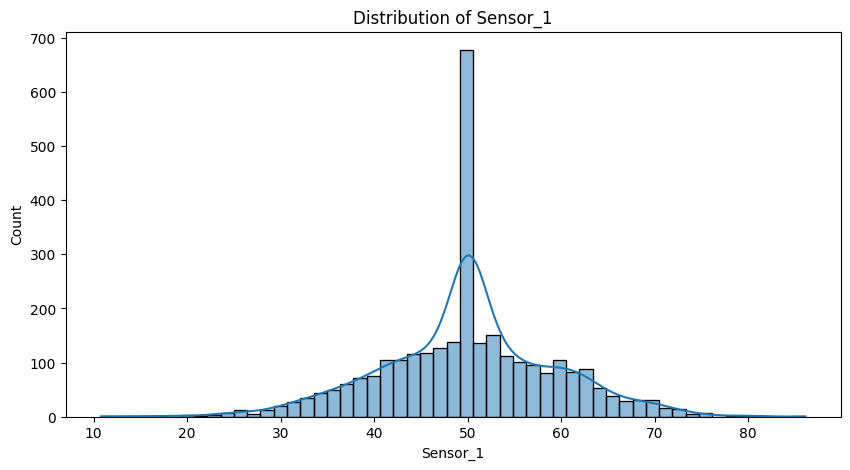

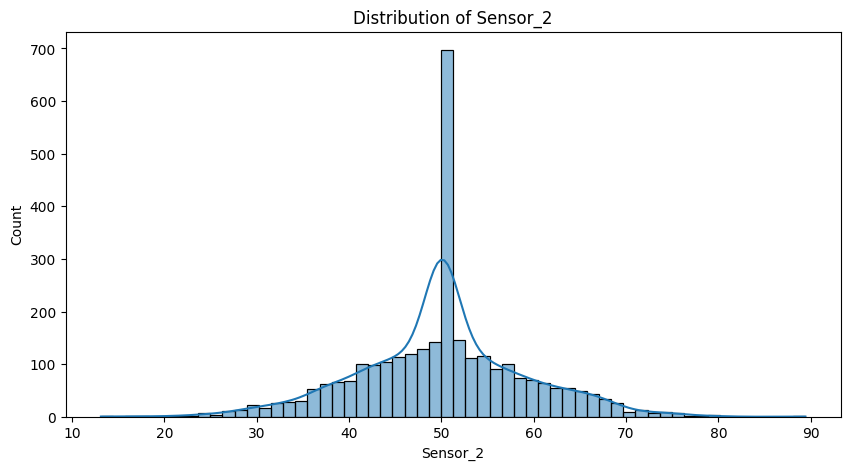

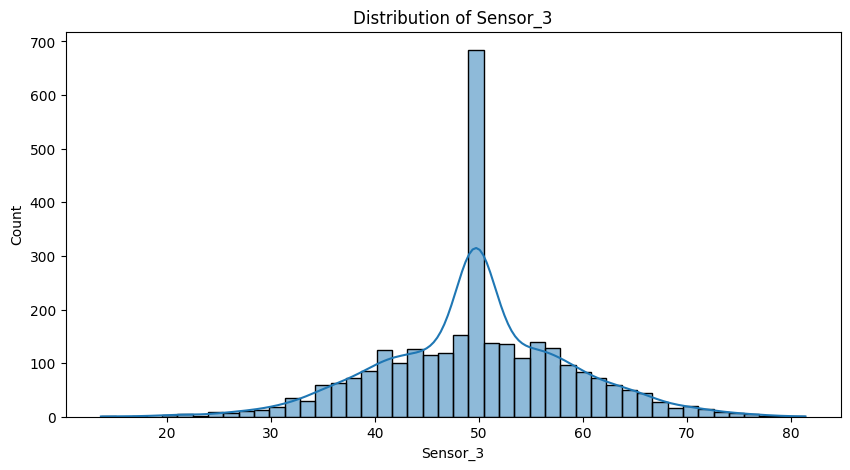

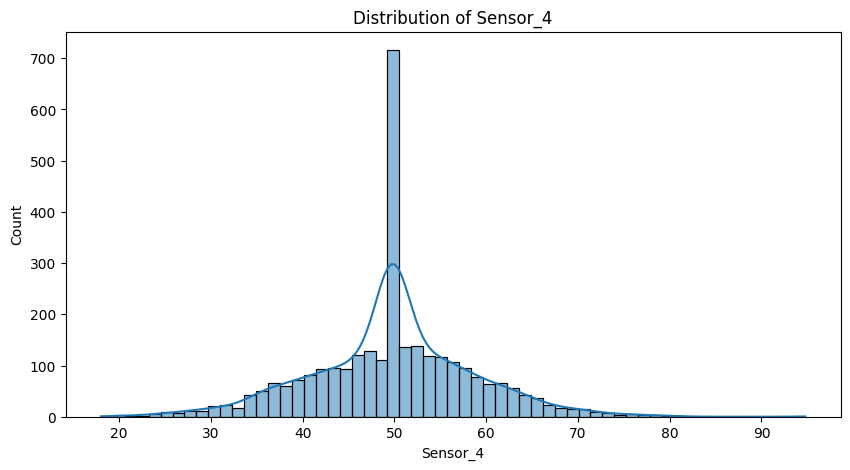

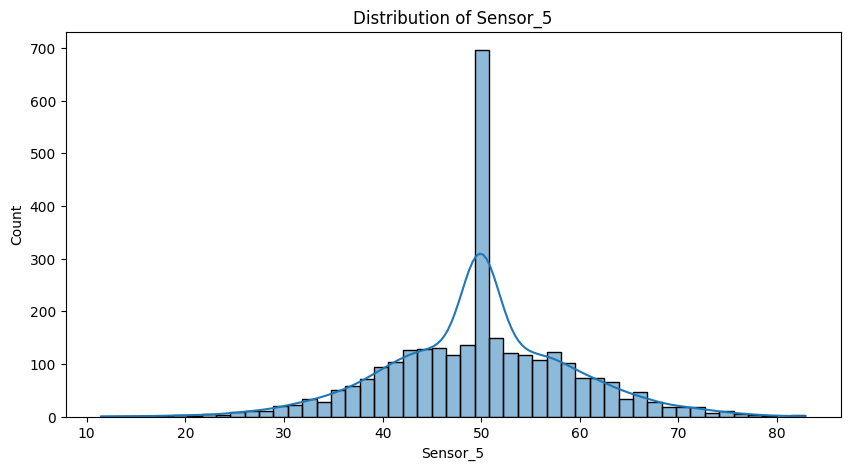

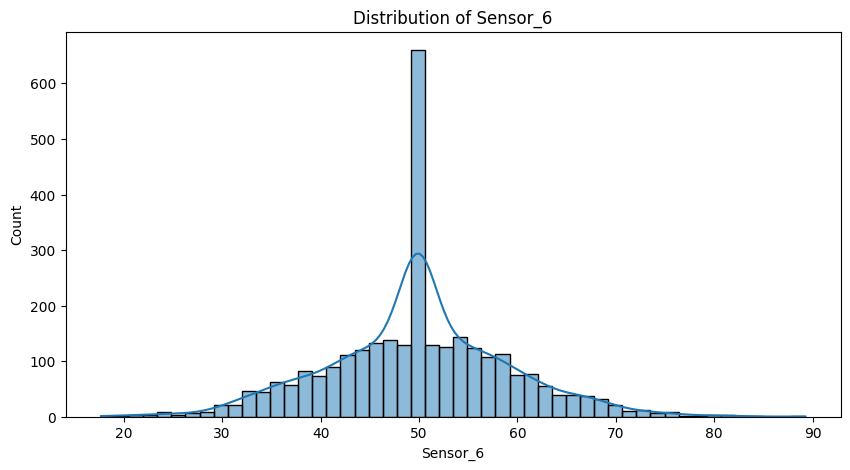

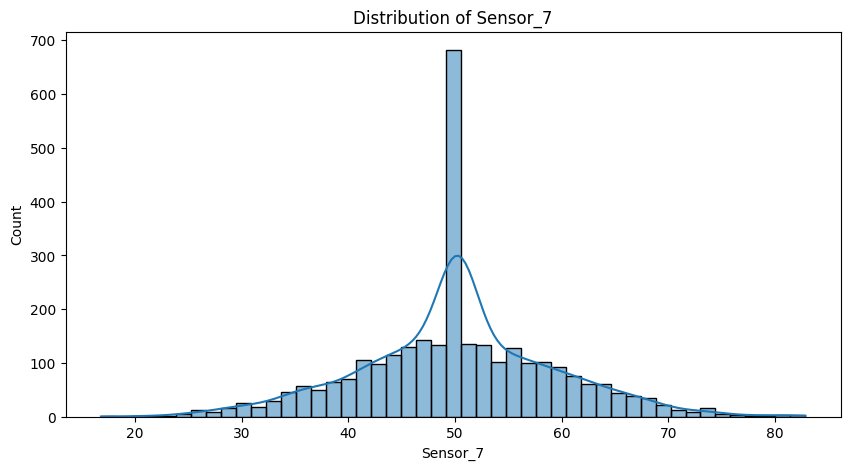

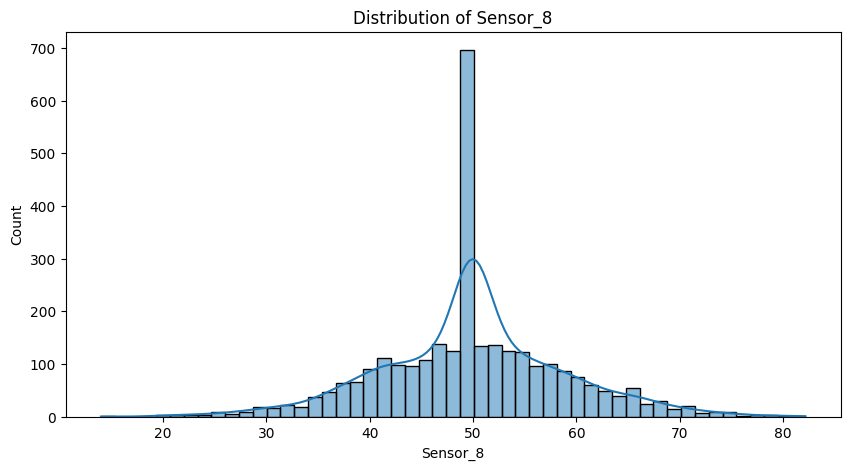

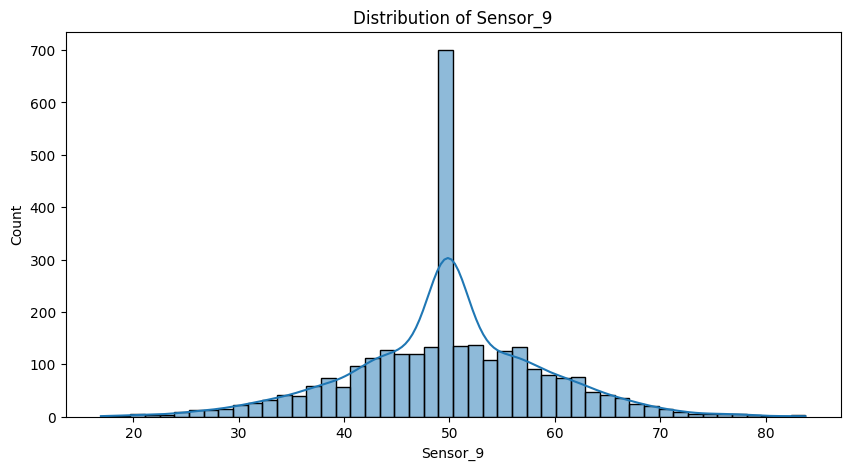

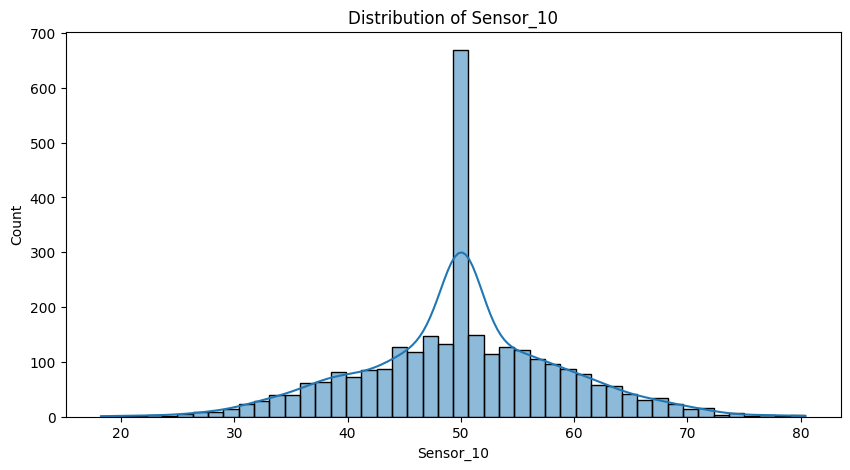

In [ ]:
for column in numerical_columnns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

In [ ]:
from statsmodels.stats.weightstats import ztest

# Z-test
z_stat,p_value = ztest(df['Sensor_1'], value=50)
# Performing z-test between Sensor_1 and 50(mean)
z_stat, p_value

# Performing z-test between Sensor_1 and Seonsor_2
z_stat, p_value = ztest(df['Sensor_1'], df['Sensor_2'])
z_stat, p_value

(0.051586755523851474, 0.9588579728492045)

In [ ]:
from scipy.stats import ttest_rel

# T-test
t_stat, p_value = ttest_rel(df['Sensor_2'], df['Sensor_3'])
t_stat, p_value

(1.419946470806708, 0.15572720629891432)

In [ ]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between Sensor_2 and Sensor_3.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between Sensor_2 and Sensor_3.")

Fail to reject the null hypothesis. There is no significant difference between Sensor_2 and Sensor_3.


In [ ]:
from scipy.stats import ttest_ind # student t-test

morning_data = df[df['Shift'] == 'Morning']
night_data = df[df['Shift'] == 'Night']

t_stat, p_value = ttest_ind(morning_data['Sensor_4'], night_data['Sensor_4'])
t_stat, p_value

(0.24476398844703656, 0.806661850824312)

In [ ]:
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in Sensor_4 between morning and night shifts.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in Sensor_4 between morning and night shifts.")

Fail to reject the null hypothesis. There is no significant difference in Sensor_4 between morning and night shifts.


In [ ]:
# H0: The proportion of faulty versus non-faulty
# sensor statis is independent of the production line

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Sensor_Status'], df['Line'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2, p, dof, expected

(3.4715967485280457,
 0.4822102431935389,
 4,
 array([[217.08 , 366.356, 220.564],
        [219.51 , 370.457, 223.033],
        [373.41 , 630.187, 379.403]]))